# ***Multiple Regression Analysis***

---
# Red Wine Quality Prediction by Zee

# **Import Library**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# **Read Dataset**

In [2]:
url = 'https://raw.githubusercontent.com/zqktlwi4fecvo6ri/Statistics-and-Probability/Stable/winequality-red.csv'
df = pd.read_csv(url)
# Random sample
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
121,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.9962,3.21,0.6,10.9,6


# **Rename Columns**

In [3]:
df = df.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide', 'total sulfur dioxide':'Total Sulfur Dioxide',
                        'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'})
df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Checking Null Value of Dataset**

In [4]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         1599 non-null   float64
 1   Volatile Acidity      1599 non-null   float64
 2   Citric Acid           1599 non-null   float64
 3   Residual Sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free Sulfur Dioxide   1599 non-null   float64
 6   Total Sulfur Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Univariate Analysis
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


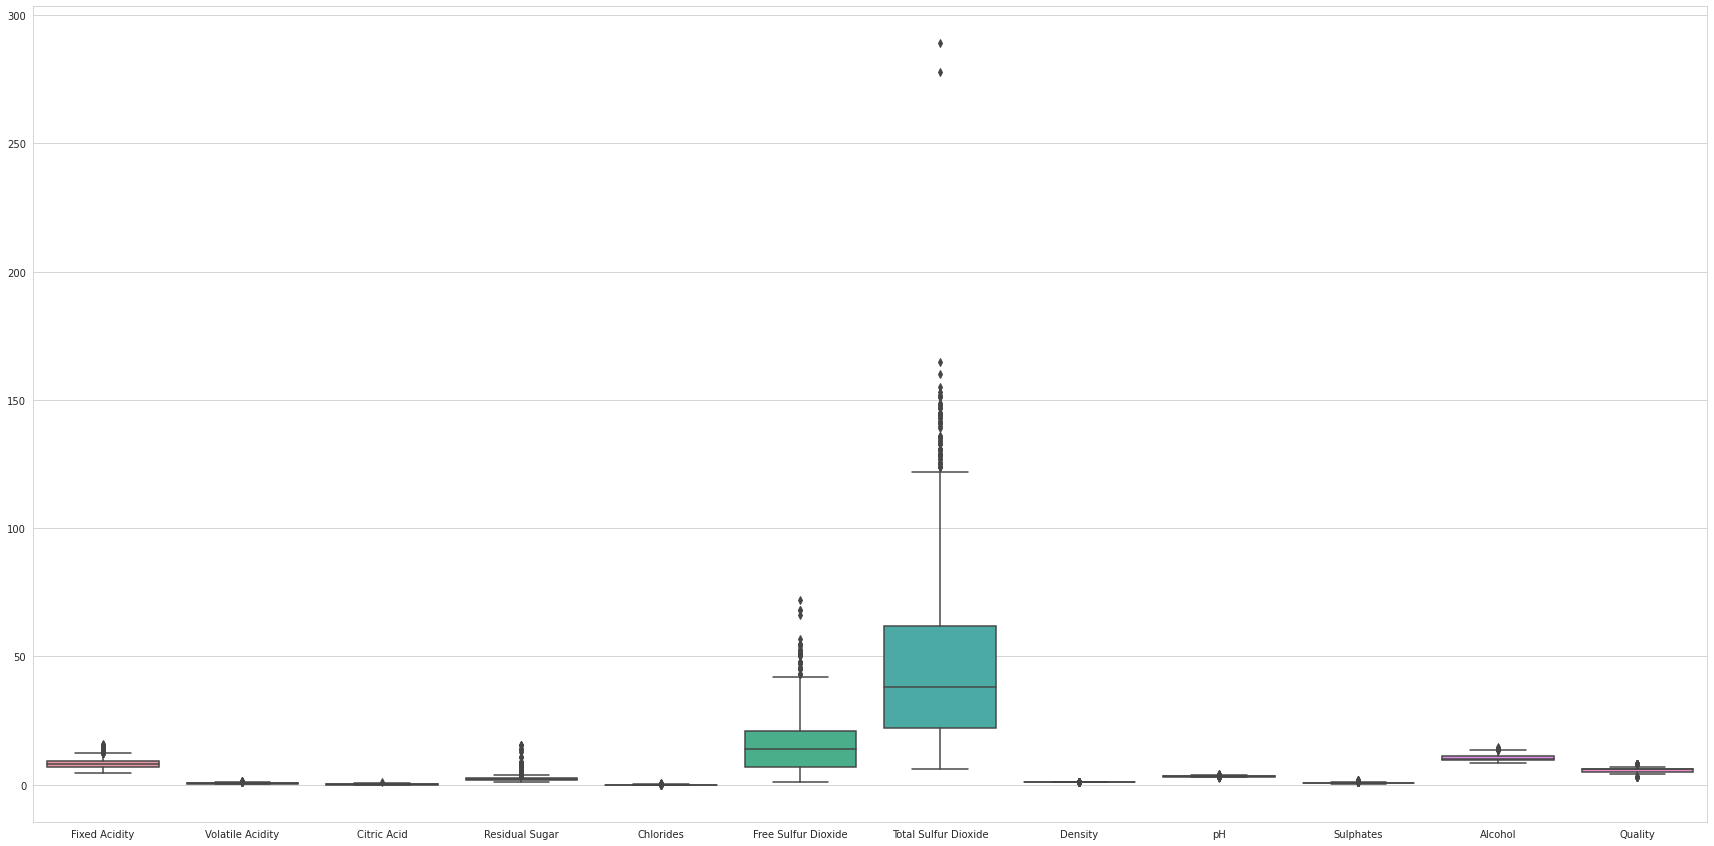

In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

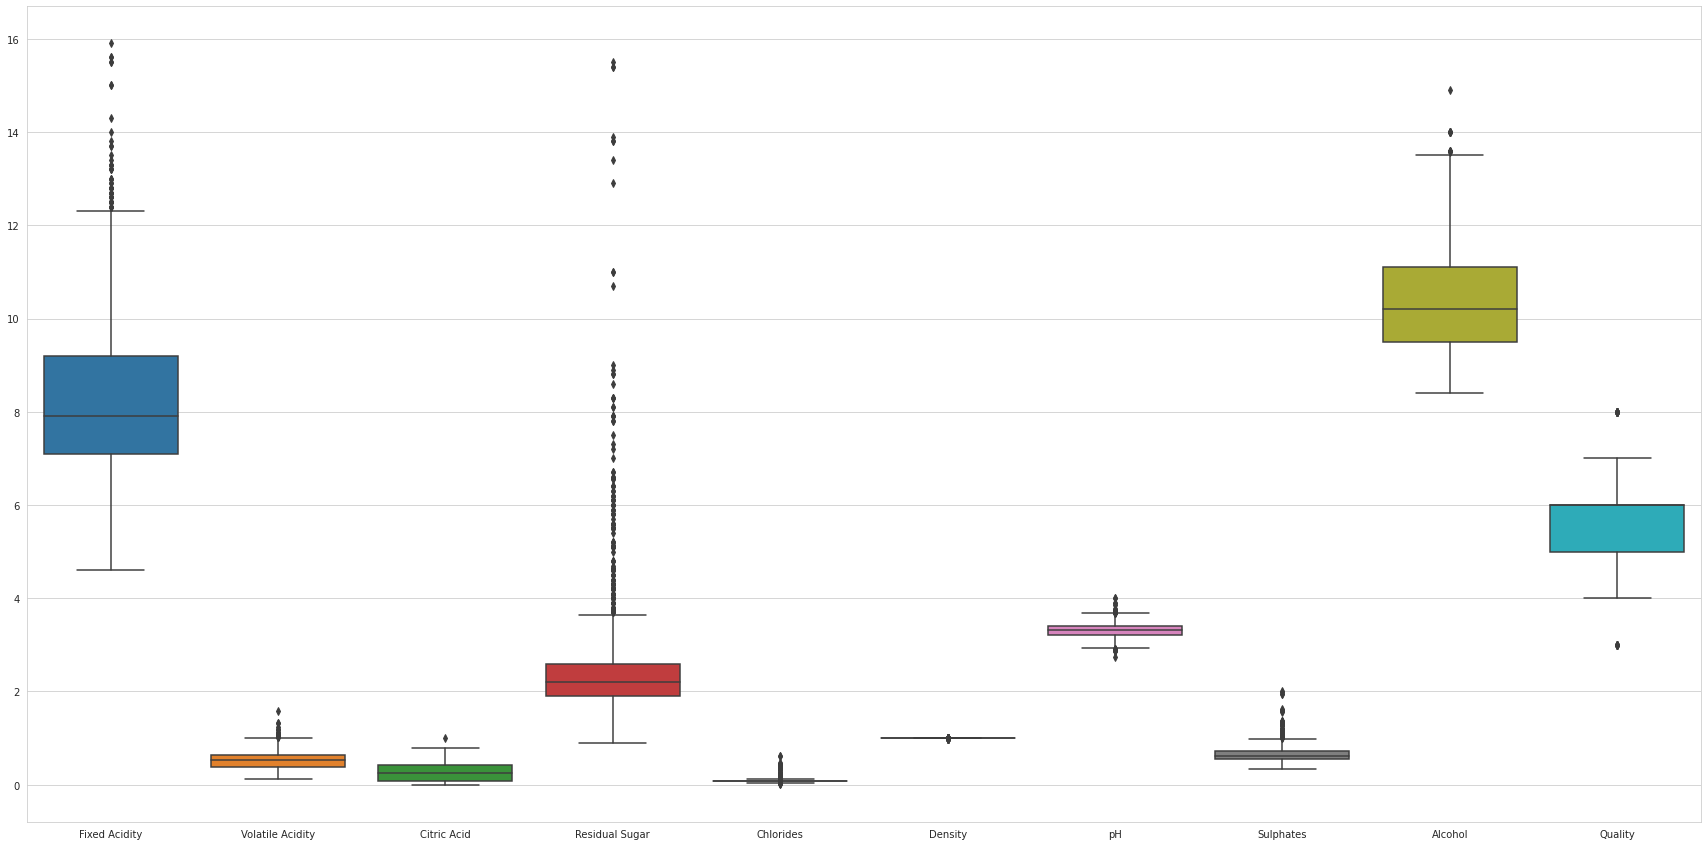

In [ ]:
plt.figure(figsize=(30, 15))
zoom = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']]
sns.boxplot(data=zoom)

<Figure size 2160x1080 with 0 Axes>

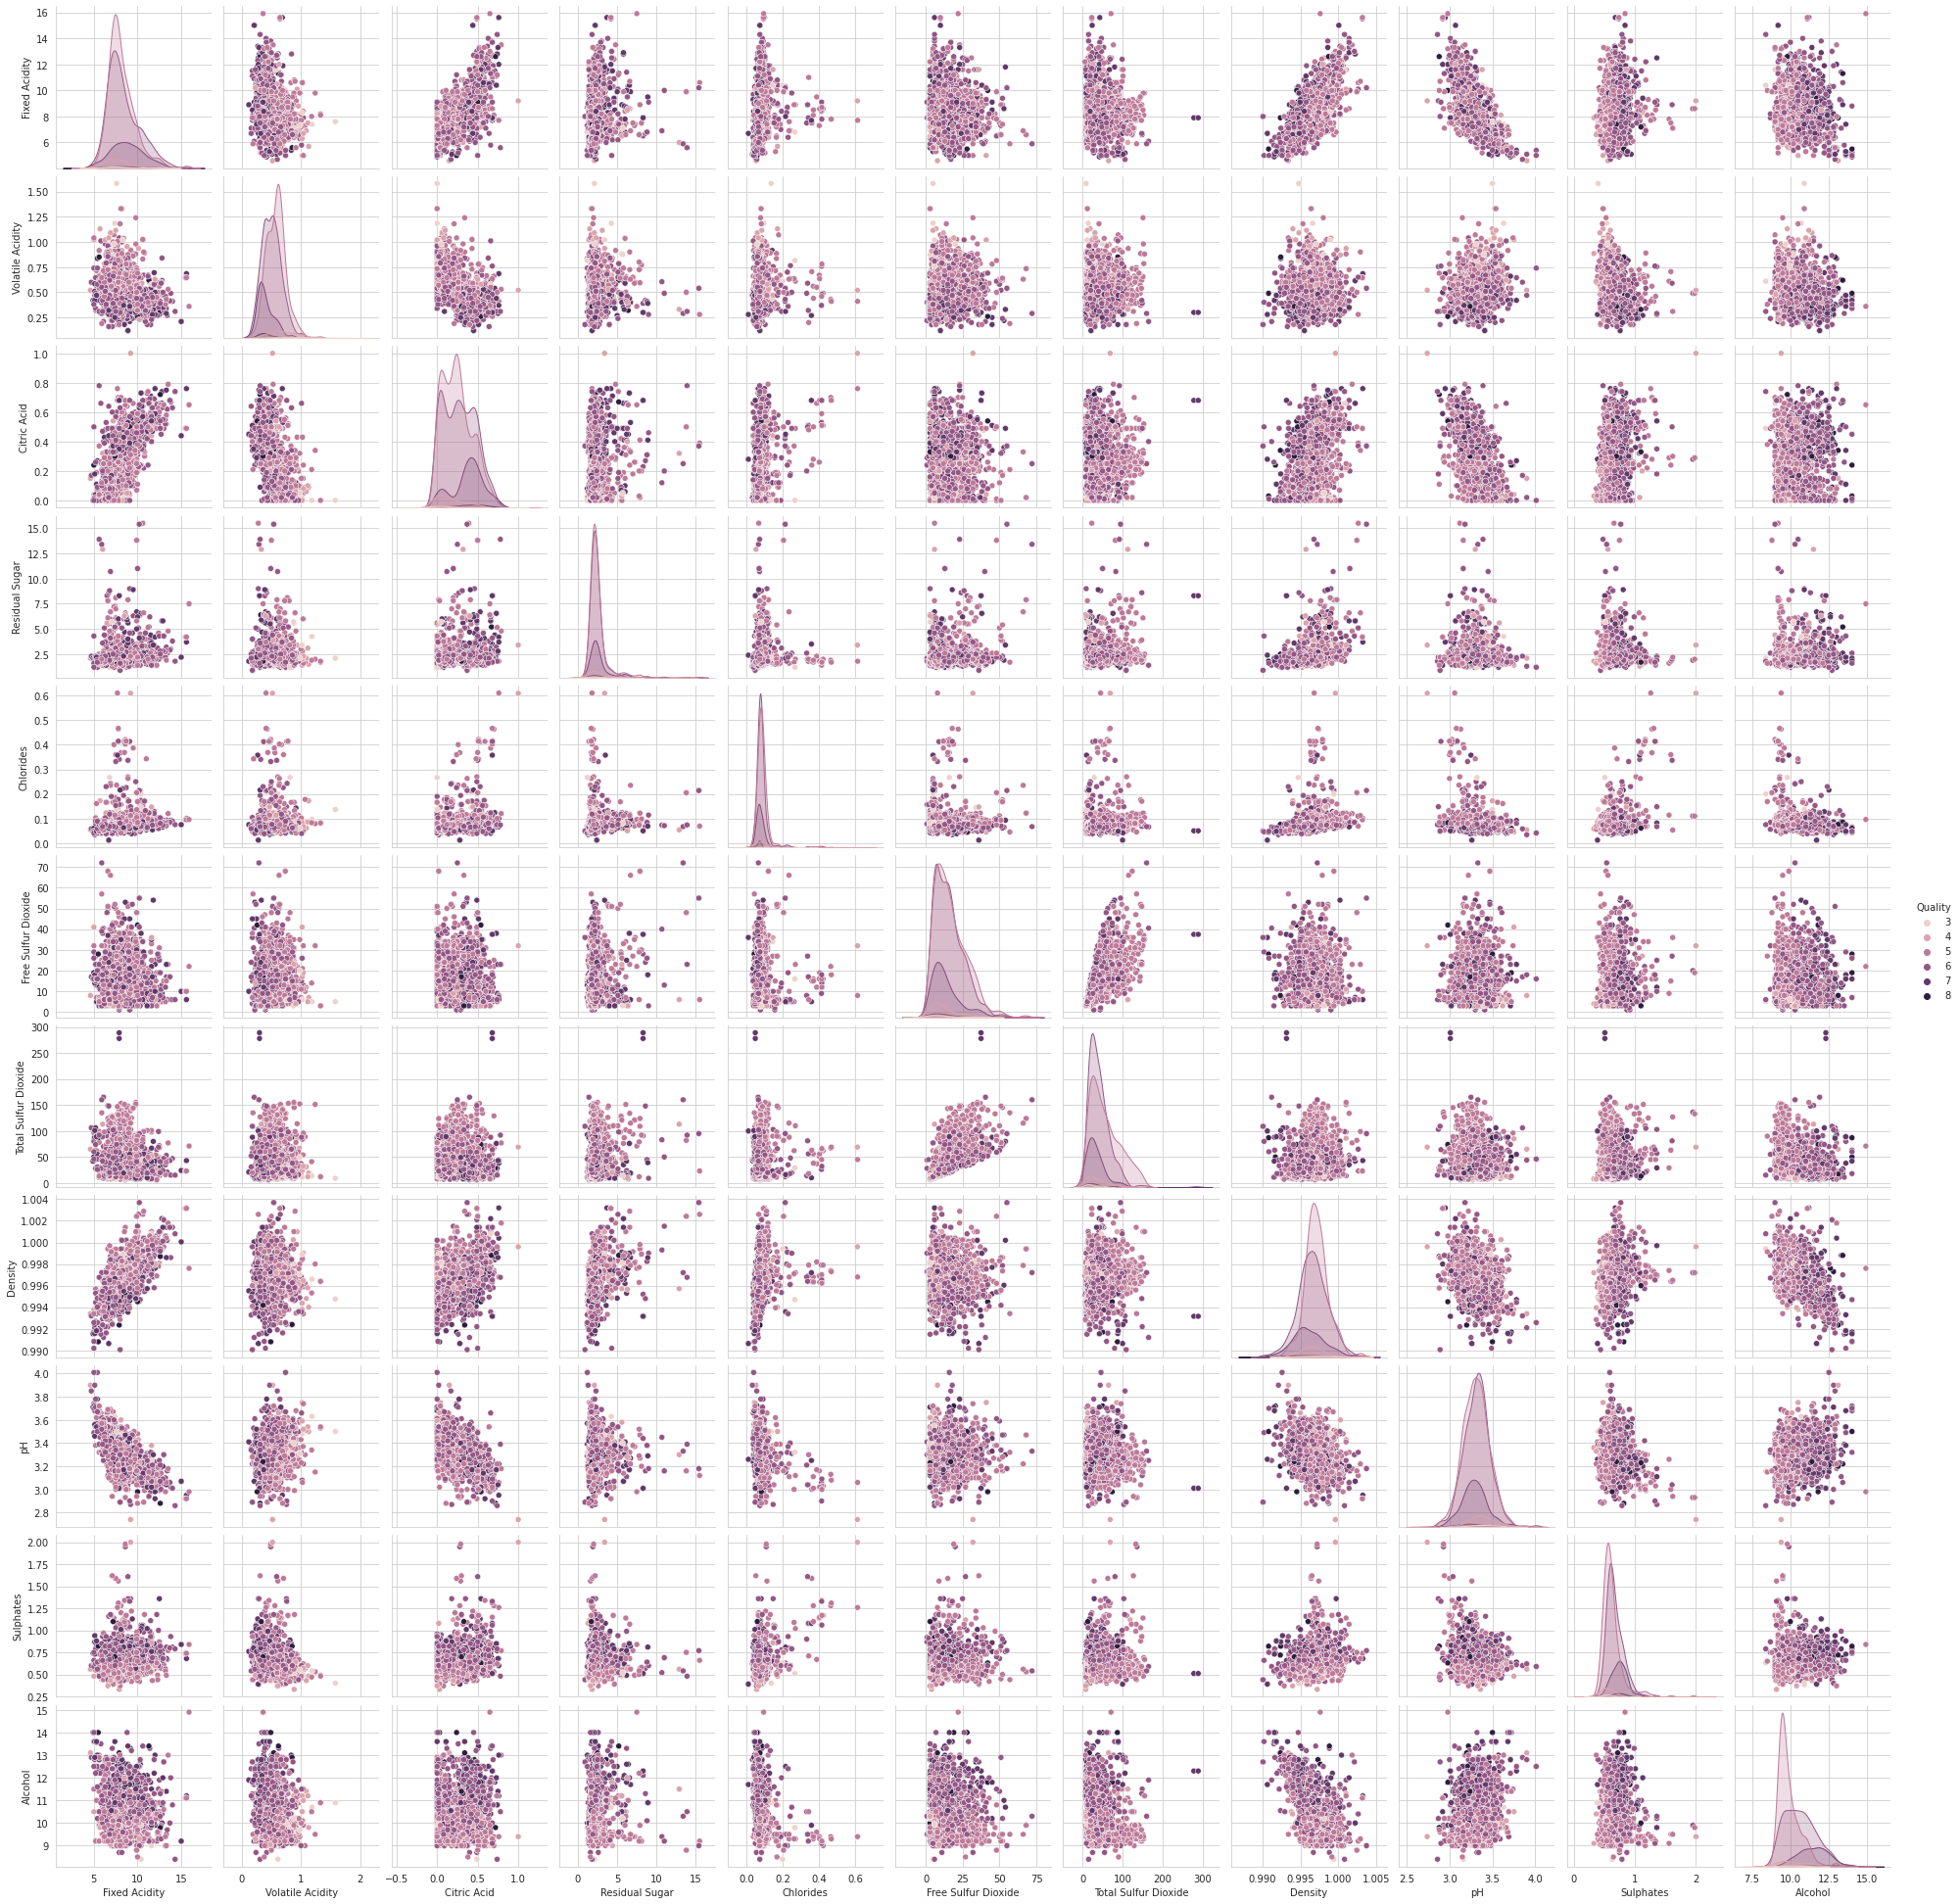

In [ ]:
# Multivariate Analysis
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='Quality')
plt.show()

# **Heatmap**

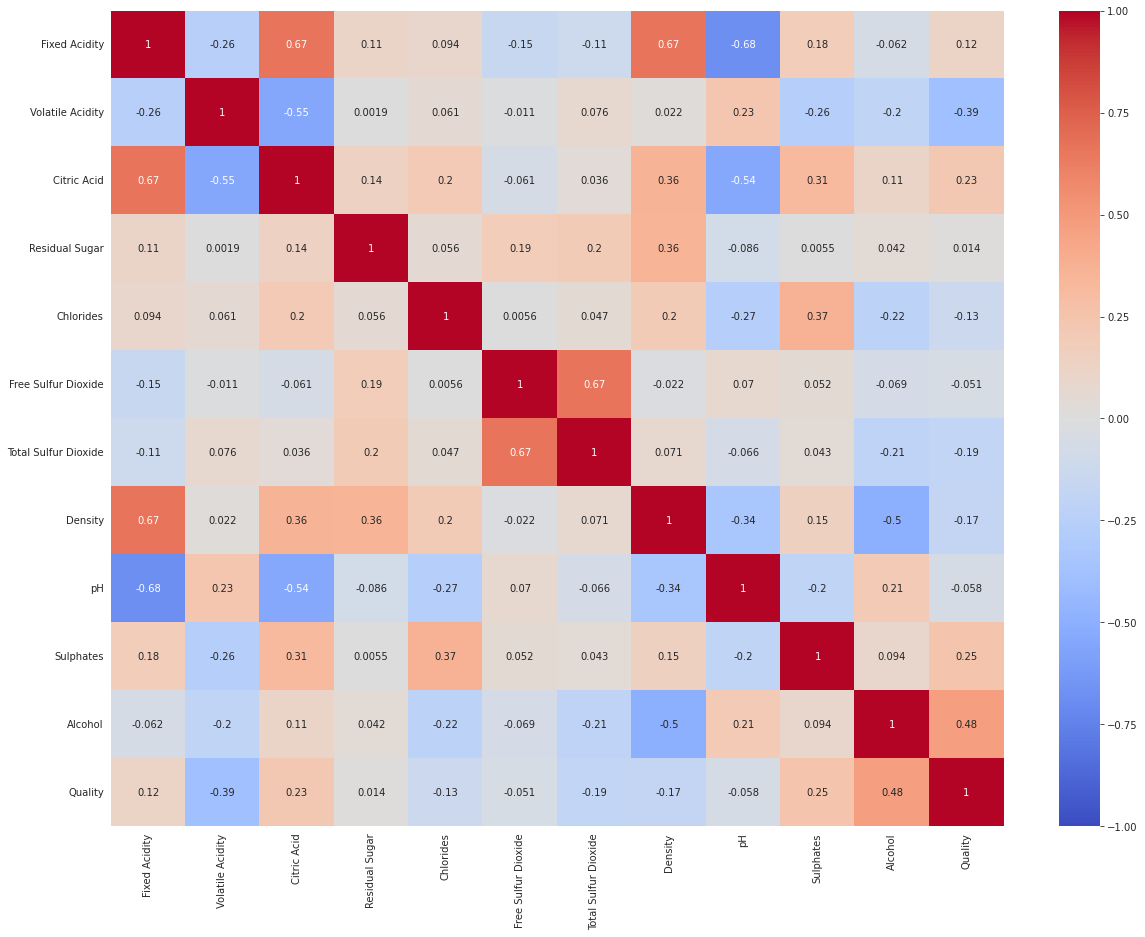

In [ ]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

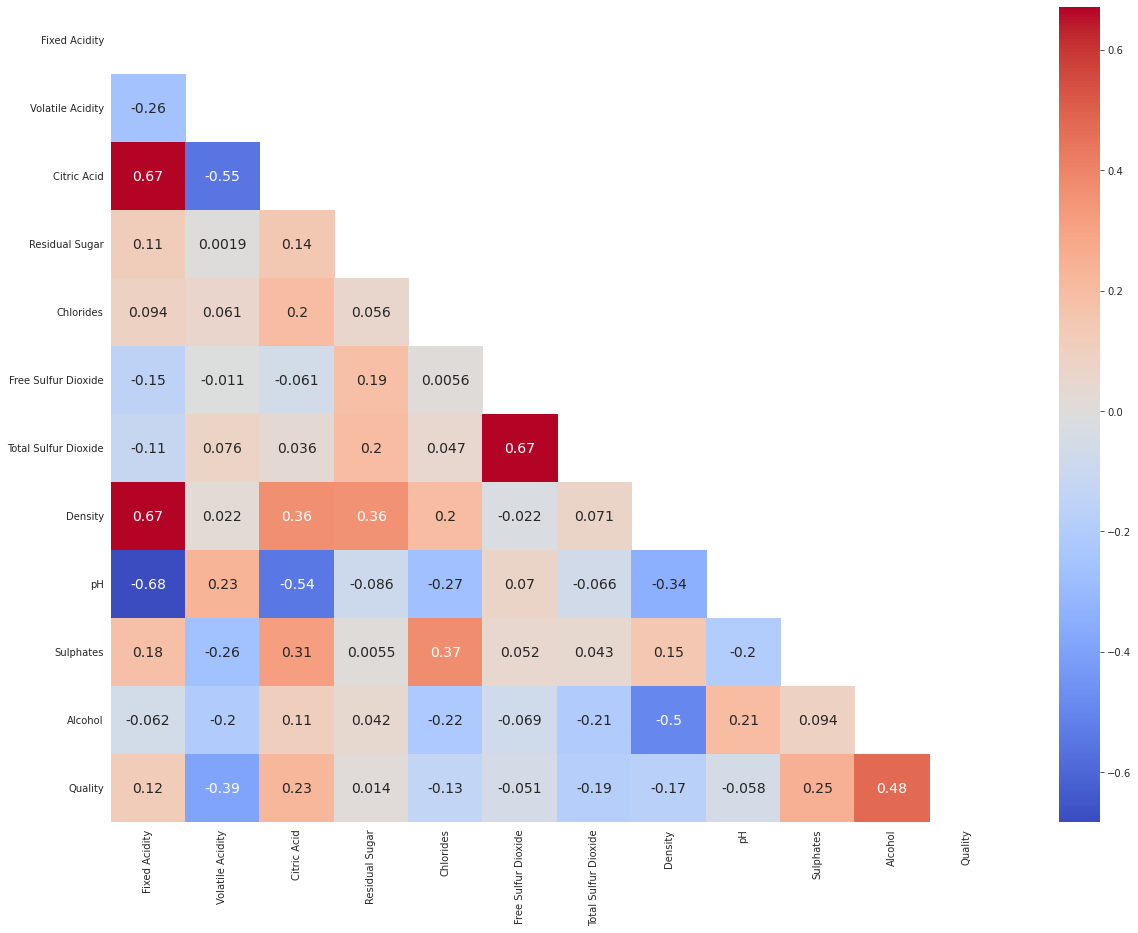

In [ ]:
# Heatmap other display
# Creates an array of zeros
zero = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(zero)
zero[triangle_indices] = True
# Check the relationship between all the features with the target (Quality)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), mask=zero, cmap="coolwarm", annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar

# **Independent Variables & Dependent Variables**

In [5]:
# Use this code
# x = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']]
# y = df[['Quality']]
# Or this
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting dataset into training set & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
# Fitting Multiple Linear Regression to the training set
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

# **Prediction**

In [7]:
# Test prediction (From Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol)
print(regr.predict([[15, 0.01, 0, 5, 0.001, 30, 50, 0.95, 3, 0.9, 15]]))
# Quality: 9.82988592 (9 out of 10)

[9.82988592]


# **Backward Elimination (Use this code if it's necessary)**

In [ ]:
# Building the optimal model using Backward Elimination
x = np.append(arr = np.ones((1599, 1)).astype(int), values = x, axis = 1)
# Choose a Significance level usually 0.05, if p > 0.05
# For the highest values parameter, remove that value
x_opt = x[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     73.61
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.94e-124
Time:                        09:07:02   Log-Likelihood:                -1622.1
No. Observations:                1599   AIC:                             3266.
Df Residuals:                    1588   BIC:                             3325.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.6787     14.266     13.295      0.000     161.696     217.662
x1             0.1720      0.023      7.643      0.000       0.128       0.216
x2            -0.9839      0.125     -7.887      0.000      -1.229      -0.739
x3             0.0469      0.150      0.312      0.755      -0.248       0.342
x4             0.0949      0.013      7.077      0.000       0.069       0.121
x5            -2.2780      0.431     -5.280      0.000      -3.124      -1.432
x6             0.0038      0.002      1.681      0.093      -0.001       0.008
x7            -0.0039      0.001     -5.195      0.000      -0.005      -0.002
x8          -188.4014     14.638    -12.871      0.000    -217.113    -159.690
x9             0.6255      0.169      3.699      0.000       0.294       0.957
x10            1.2607      0.113     11.145      0.000       1.039       1.483
==============================================================================
Omnibus:                       29.835   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.661
Skew:                          -0.152   Prob(JB):                     2.71e-11
Kurtosis:                       3.799   Cond. No.                     7.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Deleted x3 (0.755) [Residual Sugar]
x_opt = x[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     81.83
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          8.94e-125
Time:                        09:07:02   Log-Likelihood:                -1622.2
No. Observations:                1599   AIC:                             3264.
Df Residuals:                    1589   BIC:                             3318.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.3898     14.079     13.523      0.000     162.775     218.005
x1             0.1755      0.019      9.004      0.000       0.137       0.214
x2            -1.0046      0.106     -9.508      0.000      -1.212      -0.797
x3             0.0955      0.013      7.208      0.000       0.070       0.122
x4            -2.2439      0.417     -5.379      0.000      -3.062      -1.426
x5             0.0037      0.002      1.652      0.099      -0.001       0.008
x6            -0.0038      0.001     -5.294      0.000      -0.005      -0.002
x7          -189.1366     14.442    -13.096      0.000    -217.465    -160.809
x8             0.6282      0.169      3.721      0.000       0.297       0.959
x9             1.2633      0.113     11.201      0.000       1.042       1.485
==============================================================================
Omnibus:                       30.011   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.226
Skew:                          -0.150   Prob(JB):                     2.04e-11
Kurtosis:                       3.805   Cond. No.                     7.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Deleted x5 (0.125) [Total Sulfur Dioxide]
x_opt = x[:, [0, 1, 2, 4, 5, 7, 8, 9, 10]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
# This means that Alcohol, Volatile Acidity, Sulphates, Citric Acid, Density, Chlorides, Fixed Acidity, pH, & Free Sulfur Dioxide having the highest impact on the quality of Red Wine

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     91.61
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.49e-125
Time:                        09:07:02   Log-Likelihood:                -1623.6
No. Observations:                1599   AIC:                             3265.
Df Residuals:                    1590   BIC:                             3314.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.0600     14.050     13.670      0.000     164.502     219.618
x1             0.1767      0.019      9.063      0.000       0.138       0.215
x2            -1.0210      0.105     -9.701      0.000      -1.227      -0.815
x3             0.0979      0.013      7.427      0.000       0.072       0.124
x4            -2.2305      0.417     -5.345      0.000      -3.049      -1.412
x5            -0.0031      0.001     -5.572      0.000      -0.004      -0.002
x6          -190.9319     14.409    -13.251      0.000    -219.195    -162.669
x7             0.6669      0.167      3.986      0.000       0.339       0.995
x8             1.2701      0.113     11.264      0.000       1.049       1.491
==============================================================================
Omnibus:                       30.611   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.853
Skew:                          -0.158   Prob(JB):                     1.49e-11
Kurtosis:                       3.805   Cond. No.                     6.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Evaluation**

In [8]:
# # Ordinary Least Square (OLS) Principle
# x = sm.add_constant(x_train)
# model = sm.OLS(y_train, x).fit()
# print(model.summary())

In [9]:
# Evaluate our model using MSE criterion
y_pred = regr.predict(x_test)
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE):  0.3844711978201236


In [10]:
# Check quality value from dataset that is listed
print(df['Quality'].unique())

[5 6 7 4 8 3]


In [11]:
# MAPE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
mape(y_test, y_pred)
# Error of our model is approximately 8-9% (Excellent)
# MAPE result Notes :
# 1. Below 10% = Excellent
# 2. 10% - 20% = Good
# 3. 21% - 50% = Reasonable
# 4. Above 50% = Inaccurate

8.781960464319924